# STA 141B: Homework 2
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Mitchell

Last Name: Layton

Student ID: 912307956

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [1]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

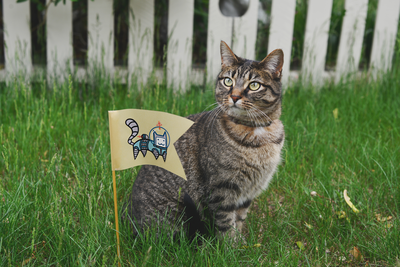

In [2]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [3]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [4]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [5]:
# Using .shape() method to return a numerical description of the cat array

np.shape(cat) # arguement can be either the cat or the cat_img


(267, 400, 3)

Exercise 1.1 (answer): The cat array has 3 dimensions where the 1st dimension has 267 observations, where each of those 267 observations contain 400 observations in which each of those observations contains 3 integers that represents the 24-bit RGB pixel numbers. The array splits the image into its RGB pixels based off of the size and length of the image. Since each byte has 8 bits that can indicate a number as a color from a scale from 0-255 for red, green, and blue, the array method we use takes the image and grabs all of the sets of 3 numbers (3 pixels) for the height and width of the 2d image. Thus that is why there is 267x400x3. The visualization of generating the picture can be thought of by working inside out. Take an array of 3 digits of byte color representation and extend it 400 long, and 267 high. 

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

In [6]:
cat_copy = cat.copy()

# Try to re-create with matrix operations in numpy
for line in cat_copy:
    for trio in line:
        temp = trio[2]
        trio[2] = trio[1]
        trio[1] = temp

# using PIL to recreate changed pixel data to an image
img = Image.fromarray(cat_copy, "RGB")
img.save("cat_copy.png")
img.show()

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

If we did not use ".copy()", then we would have altered our main photo directly which may not necessarily be desirable because it can cause complications when referecing an object to two different variables. This allows us to have some fun with tinkering and playing around with color levels of our copy without directly changing our original png file. 

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

In [7]:
from numpy import flip

cat_copy = cat.copy()

cat_copy[:,:,2] = np.fliplr(cat_copy[:,:,2])

img = Image.fromarray(cat_copy, "RGB")
img.save("cat_copy.png")
img.show()

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [8]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [9]:
red_chan = cat_copy[:,:,0]

def svd_and_PCA(matrix, q):
    """
    Input parameters:
        1. (n x p) matrix for color channel of cat image
        2. integer q specifying # of principal components
    
    Returns:
        Approximation of original input matrix: x_approx
    """
    X = matrix
    u, d, vt = np.linalg.svd(X)
    
    Vq = vt[:q].T
    XVq = X@Vq
    vtq = vt[:q]
    X_approx = XVq@vtq
    return(X_approx,XVq)
    
    
approximate = svd_and_PCA(red_chan, 7)[0]
XVq = svd_and_PCA(red_chan, 10)[1]
print(approximate)
img = Image.fromarray(approximate)
img.show()

print("\nThe smallest number of terms where the cat is still recognizable as a cat roughly 7 terms. \nAt 6 or less terms, it is just too stretched to depict a cat.")

[[  43.7604545    46.81148787   81.59031442 ...,  200.03702427
   178.63028828  150.897436  ]
 [  44.08014375   47.08141198   82.20435232 ...,  201.63906562
   180.23418217  152.4842719 ]
 [  43.96532851   46.95725005   82.27799415 ...,  202.13312091
   180.81795317  153.11079022]
 ..., 
 [  72.05607548   68.9203775    70.02574324 ...,   76.89760928
    73.38771262   73.35497082]
 [  68.7021975    65.90812756   67.87205788 ...,   79.67222673
    76.14709723   76.02729881]
 [  66.68624511   63.84318343   65.56911174 ...,   76.01376232
    72.19367372   71.53513242]]

The smallest number of terms where the cat is still recognizable as a cat roughly 7 terms. 
At 6 or less terms, it is just too stretched to depict a cat.


## __Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [10]:
num_bytes = red_chan.nbytes
print(num_bytes, "bytes in the red color channel of the cat image.")

num_bytes_approx = XVq.nbytes
percentage = (num_bytes_approx/num_bytes)*100
print(num_bytes_approx, "bytes in the compressed version when 10 terms are kept which is",str(percentage)[0:2]+"%.")



106800 bytes in the red color channel of the cat image.
21360 bytes in the compressed version when 10 terms are kept which is 20%.


## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [11]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [12]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [13]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j  -1.+0.j]
 [ -1.+0.j   0.+0.j]] 
x approx is:
 [[ 1.33333333  1.83333333  1.83333333]
 [ 1.66666667  2.16666667  2.16666667]]


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [14]:
def FFT(matrix,q,zero):
    """
    Input:
        1) matrix  :  of (n x p): such as a color channel of cat image
        2) q       :  tells how much of the matrix we want to keep before inverting it
        3) zero    :  where to start zeroing-out in bottom right of coefficient matrix
        
    Returns:
        An approximation of X (n x p) matrix.
    """
    
    m = np.fft.rfft2(matrix)
    # Zero's out first
    m[zero:,zero:] = 0
    # Then takes up to the q-elements 
    m = m[:q,:q]
    byte_s = np.complex64(m.nbytes)
    n = np.fft.irfft2(m, matrix.shape)
    return(n, np.ndim(m), byte_s)
    

dim = FFT(red_chan,5,10)[1]
    

# specify at index 0 and 1 respectively because functions returns 2 items
x_approx = FFT(red_chan, 50,20)[0]
dim = FFT(red_chan,5,10)[1]

print(x_approx)
img = Image.fromarray(x_approx)
img.show()
    
print("\n\n","Dimensions: ",dim," --> ",np.shape(x_approx),"\n")


# least number of (q) and (zero) parameters to distinguish cat:
print("\nThe smallest number of terms for q and zero where the cat is still recognizable as a cat and not just a blob and outine of the cat is about q = 50 and zero = 20")

[[ 106.81869417   77.65749193   59.90350832 ...,  181.39423498
   166.06727877  139.20300505]
 [ 106.82511324   79.15306356   63.85623853 ...,  183.81267228
   166.88811999  139.03935449]
 [ 100.99357203   74.49601021   61.02779101 ...,  180.15222348
   161.82421753  133.09519628]
 ..., 
 [  96.89115013   66.74219295   42.64231555 ...,  150.48252445
   144.14550995  125.05984647]
 [  97.07185869   66.05208378   43.12419701 ...,  160.41186049
   150.46273414  127.83016884]
 [ 101.96151351   71.44867667   50.90092093 ...,  172.35331041
   159.29923026  134.04966378]]


 Dimensions:  2  -->  (267, 400) 


The smallest number of terms for q and zero where the cat is still recognizable as a cat and not just a blob and outine of the cat is about q = 50 and zero = 20


__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [15]:
# Going to show 5 images for each SVD and FFT, varying by 10 for clarity and to test bytes:


# This cell is for running the SVD images

# 5 images for svd

svd_bytes = []
for i in range(5,46,10):
    x,y = svd_and_PCA(red_chan, i)
    count_svd = np.uint64(y.nbytes)
    svd_bytes.append(count_svd)
    img = Image.fromarray(x)
    img.show()

# prints ascending bytes of each images in the loop    
print("Bytes per image (ascending) dependent on q (start: q=5, end q=45, by=10):",svd_bytes)


Bytes per image (ascending) dependent on q (start: q=5, end q=45, by=10): [10680, 32040, 53400, 74760, 96120]


In [16]:
# 5 images for FFT(parameters q & zero are equal)

fft_bytes_equal = []
for i in range(5,46,10):
    f1, dim, byt1 = FFT(red_chan, i, i)
    fft_bytes_equal.append(int(str(byt1)[1:-4]))
    img = Image.fromarray(f1)
    img.show()
    
print("Bytes per FFT image dependent on q and zero (equal) where start: q=5, end q=45, by=10:",fft_bytes_equal)


Bytes per FFT image dependent on q and zero (equal) where start: q=5, end q=45, by=10: [400, 3600, 10000, 19600, 32400]


To start, note that I tested out if changing the zero parameter in my FFT function would result in different size bytes for our analysis comparing SVD to FFT. But when setting the zero parameter equal to q, it does not matter if you change zero to anything below that because it will not change the byte values.

Beginning the analysis on the number of bytes and image clarity for a variety of different images for each method. I chose to use 5 images and starting the q parameter at 5, and increasing it by 10 for each image until it got to a q=45. This was beacuse past a certain q, the image would not noticably increase in clarity to the human eye, so that amount was sufficient for the analysis. What we notice for the SVD case is that the first image is the most blurry, but each subsequent image after that up until the 4th to 5th change increases its image clarity pretty substantially. Further with each q=10 jump per image, we notice that the bytes increase by 21,360. I will discuss which method is better after the image clarity and byte analysis. So let us move onto the FFT image clarity and byte sizes.

What we notice is the obvious difference in image processing by the FFT method. That being said, the subsequent jumps by q=10 improves the identifiability of the cat, but does not drastically sharpen the image clarity much at all. We need a lot more of the image date to generate the cat image successfully as a gray image. Comparitively, the SVD process is more easily able to generate the image with lower values of q from their matrix method. Byte number increases in FFT is not additive by a constant such as the case with the SVD byte increases. This is more multiplicative that additive.

For dimension reduction, the winner is the SVD method because the mathematical use of decomposing the data from a matrix into 3 real valued matrices (UDVt) that identify the covariates of the data that are not relevant. Further, SVD and principal component anlysis is very good at taking in n dimensions (say n=10) and finding the first 2 or 3 principal directions of eigenvalues that account for the majority of the total variance, thus easily eliminating the other variables from the data. 

It's clear that FFT is a more effective approach for image compression because it takes less bytes and generate an overall more clearer image. We can notice that we see the outline of the cat in the FFT method but without much quality, where at low q values, the SVD method produces a distorted image of the cat which is unrecognizable. Further once SVD processing uses higher q to generate the clearer image, it will use more bytes compared to the FFT.
